<a href="https://colab.research.google.com/github/Lizette95/Team_RM5_ClassificationPredict_Notebook/blob/master/Team_RM5_ClassificationNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="top"></a>
# Team RM5 Classification Predict Notebook
### Kaggle Submission: Team_RM5_SigmoidFreuds <sup>*</sup>
---
<img src="https://github.com/Lizette95/classification-predict-streamlit-template/blob/master/resources/imgs/rm5_banner.png?raw=true" align="left">  

**Team Members:** Abednego Pakaree, Iman Mokwena, Lizette Loubser, Omphile Louw, Refiloe Elvis Phipa, Silindokuhle Kubheka    
**Supervisor:** Ridha Moosa

* [Notebook repo](https://github.com/Lizette95/Team_RM5_ClassificationPredict_Notebook)
* [Streamlit repo](https://github.com/Lizette95/classification-predict-streamlit-template)
* [Trello board](https://trello.com/b/pFKnwtGF/classificationteamrm5) 

### Table of Contents
---
1. [Introduction](#intro)
 * Background
 * Problem Statement
---
2. [Load Dependencies](#imports)
---
3. [Data Cleaning](#cleaning)
---
4. [Exploratory Data Analysis](#EDA)
 * Datasets and Variables
 * Data Summary
 * Label
 * WordClouds
 * Sentiment Analysis
 * Subjectivity and Polarity
 * Character and Word Frequencies
 * URL Analysis
 * Domain, Hashtag and Mention Analysis
 * Retweet Analysis
---
5. [Data Preprocessing](#preprocessing)
 * Lemmatisation
 * Split Training and Validation Sets
 * Feature Extraction
---
6. [Modelling](#modelling)
 * Multinomial Naive Bayes
 * Logistic Regression
 * Random Forest Classifier
 * Support Vector Classifier
 * Linear SVC
 * K Neighbours Classifier
 * Decision Tree Classifier
 * AdaBoost Classifier
---
7. [Performance Evaluation](#evaluation)
 * Performance Metrics of Best Models
 * Hyperparameter Tuning of Best Models
---
8. [Model Analysis](#analysis)
 * Performance Metrics
 * ROC Curves and AUC
 * Results
---
9. [Conclusion](#conclusion)
---
10. [Save Model and Output](#save)
---

<a id="intro"></a>
## 1. Introduction  

### Background

Machine learning is the study of computer algorithms that improve automatically through experience. It is a powerful branch of Artificial intelligence, dating as far back as 1952. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.

Classification is a process of categorizing a given set of data into classes, It can be performed on both structured or unstructured data. The process starts with predicting the class of given data points. The classes are often referred to as target, label or categories.


### Problem Statement

Build a classification model that will predict the sentiments of Tweets related to climate change.


<a id="imports"></a>
## 2. Load Dependencies

In [4]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# Install Prerequisites
# import sys
# !{sys.executable} -m pip install wordcloud comet_ml scikit-learn scikit-plot
# nltk.download('vader_lexicon')

# Exploratory Data Analysis
import re
import time
import nltk
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

# Data Preprocessing
import string
from bs4 import BeautifulSoup
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.utils import resample
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Performance Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")

<a id="cleaning"></a>
## 3. Data Cleaning

In [6]:
train_data = pd.read_csv('https://raw.githubusercontent.com/Lizette95/classification-predict-streamlit-template/master/Data/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/Lizette95/classification-predict-streamlit-template/master/Data/test.csv')
df_train = train_data.copy() #For EDA on raw data
df_test = test_data.copy()

In [ ]:
train_data.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
test_data.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [ ]:
def clean(df):
    df['token'] = df['message'].apply(TweetTokenizer().tokenize) ## first we tokenize
    df['punc'] = df['token'].apply(lambda x : [i for i in x if i not in list(string.punctuation)]) ## remove punctuations
    df['dig'] = df['punc'].apply(lambda x: [i for i in x if i not in list(string.digits)]) ## remove digits
    df['final'] = df['dig'].apply(lambda x: [i for i in x if len(i) > 1]) ## since we not removing stopwords, remove all words with only 1 character
    return df['final']

train_data['final'] = clean(train_data)
test_data['final'] = clean(test_data)

<a id="EDA"></a>
## 4. Exploratory Data Analysis

### Datasets and Variables

**Datasets:**  
* train.csv: We will use this data to train our model.  
* test.csv: We will use this data to test our model.  

**Variables:**  
* sentiment: Sentiment of tweet  
* message: Tweet body  
* tweetid: Unique Twitter ID  

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:  

| Class | Description                                                                              |
| :----:|:-----------------------------------------------------------------------------------------|
| **2** |**News:** The tweet links to factual news about climate change                            |
| **1** |**Pro:** The tweet supports the belief of man-made climate change                         |
| **0** |**Neutral:** The tweet neither supports nor refutes the belief of man-made climate change |
| **-1**|**Anti:** The tweet does not believe in man-made climate change                           |

### Data Summary

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
 3   token      15819 non-null  object
 4   punc       15819 non-null  object
 5   dig        15819 non-null  object
 6   final      15819 non-null  object
dtypes: int64(2), object(5)
memory usage: 865.2+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
 2   token    10546 non-null  object
 3   punc     10546 non-null  object
 4   dig      10546 non-null  object
 5   final    10546 non-null  object
dtypes: int64(1), object(5)
memory usage: 494.5+ KB


---
From the above summaries, we note that:
* None of our datasets have **missing values**
* There is no **sentiment** column in the test data, as this is the **label** that we want to predict
* There are **15 819** entries in our training dataset
* There are **10 546** entries in our testing dataset

### Label
We can examine the number of tweets that fall within a sentiment class and calculate the proportion of tweets that is represented by each class.

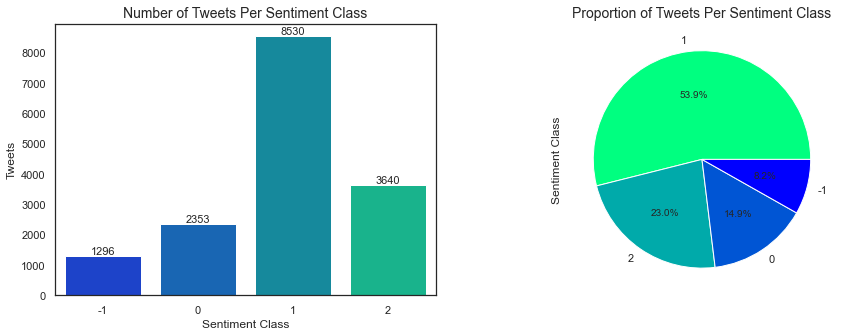

In [ ]:
# Number of Tweets Per Sentiment Class
fig, axis = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.countplot(x='sentiment',data=train_data,palette='winter',ax=axis[0])
axis[0].set_title('Number of Tweets Per Sentiment Class',fontsize=14)
axis[0].set_xlabel('Sentiment Class')
axis[0].set_ylabel('Tweets')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')

train_data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%',colormap='winter_r',ax=axis[1])
axis[1].set_title('Proportion of Tweets Per Sentiment Class',fontsize=14)
axis[1].set_ylabel('Sentiment Class')
    
plt.show()

The graphs reveal that our data is imbalanced, as more than 50% of the entries fall within sentiment class "1". This will have to be addressed in the data preprocessing step before building our models.

### WordClouds   
Wordclouds can be used to visualise text data, where the frequency of each word is proportional to the word size.

In [ ]:
# Remove noise
stop_words = stopwords.words('english')
stop_words.extend(['via','rt'])

def remove_noise(tweet):
    """
    Remove noise from text data, such as newlines, punctuation, URLs and numbers.
    """
    new_tweet = BeautifulSoup(tweet, "lxml").text #HTML Decoding
    new_tweet = re.sub(r'http\S+', '', new_tweet) #Remove URLs
    new_tweet = new_tweet.lower() #Remove Capital Letters
    new_tweet = new_tweet.replace('\n',' ') #Remove Newlines
    new_tweet = re.sub('#(RT|rt)*', '', new_tweet) #Remove RT #s
    new_tweet = re.sub('@\w*', '', new_tweet) #Remove Mentions
    new_tweet = re.sub('\w*\d\w*','', new_tweet) #Remove Numbers/Words with Numbers
    new_tweet = re.sub('[^a-zA-z\s]', '', new_tweet) #Remove Punctuation
    new_tweet = ' '.join(word for word in new_tweet.split() if word not in stop_words) #Remove Stopwords
    return new_tweet

df_train['noise'] = df_train['message'].apply(remove_noise)
df_test['noise'] = df_test['message'].apply(remove_noise)

In [ ]:
# Make Wordclouds
def wc(df):
    """
    Join words to create wordclouds.
    """
    words = ''
    for i in df:  
        words += i+" "
    return words
# Training Set
train_words = wc(df_train['noise'])
train_wordcloud = WordCloud(width=1500, height=700, background_color='white', colormap='winter', min_font_size=10).generate(train_words)
# Testing Set
test_words = wc(df_test['noise'])
test_wordcloud = WordCloud(width=1500, height=700, background_color='white', colormap='winter_r', min_font_size=10).generate(test_words)

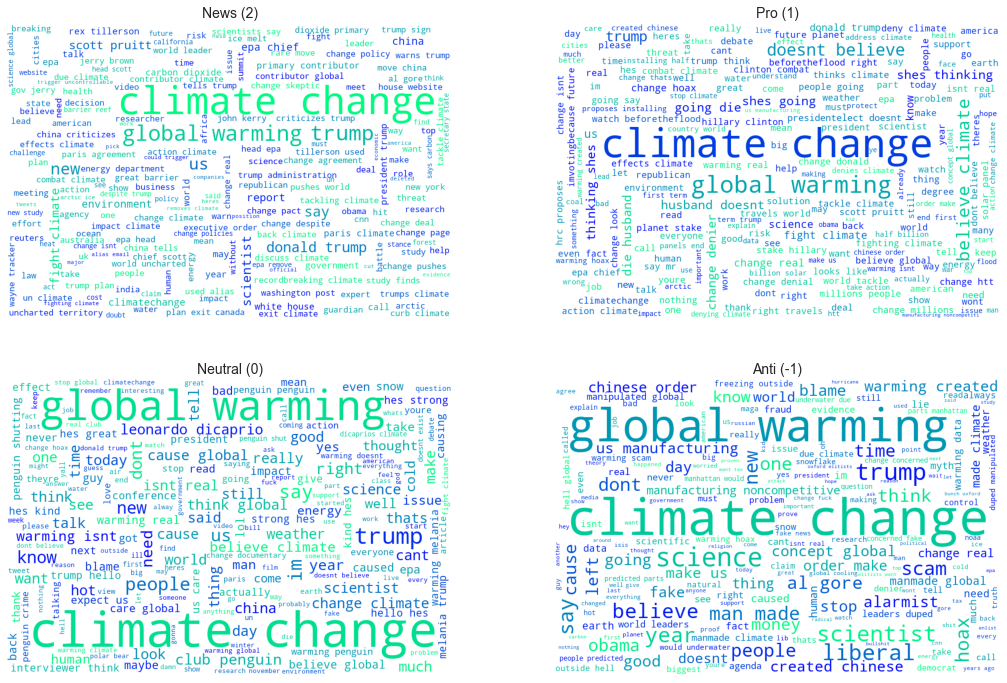

In [ ]:
# Wordcloud Per Sentiment Class
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

news = wc(df_train['noise'][df_train['sentiment']==2])
news_wordcloud = WordCloud(width=900, height=600, background_color='white', colormap='winter').generate(news)
axis[0, 0].imshow(news_wordcloud)
axis[0, 0].set_title('News (2)',fontsize=14)
axis[0, 0].axis("off") 

neutral = wc(df_train['noise'][df_train['sentiment']==0])
neutral_wordcloud = WordCloud(width=900, height=600, background_color='white', colormap='winter', min_font_size=10).generate(neutral)
axis[1, 0].imshow(neutral_wordcloud)
axis[1, 0].set_title('Neutral (0)',fontsize=14)
axis[1, 0].axis("off") 

pro = wc(df_train['noise'][df_train['sentiment']==1])
pro_wordcloud = WordCloud(width=900, height=600, background_color='white', colormap='winter', min_font_size=10).generate(pro)
axis[0, 1].imshow(pro_wordcloud)
axis[0, 1].set_title('Pro (1)',fontsize=14)
axis[0, 1].axis("off") 

anti = wc(df_train['noise'][df_train['sentiment']==-1])
anti_wordcloud = WordCloud(width=900, height=600, background_color='white', colormap='winter', min_font_size=10).generate(anti)
axis[1, 1].imshow(anti_wordcloud)
axis[1, 1].set_title('Anti (-1)',fontsize=14)
axis[1, 1].axis("off") 

plt.show()

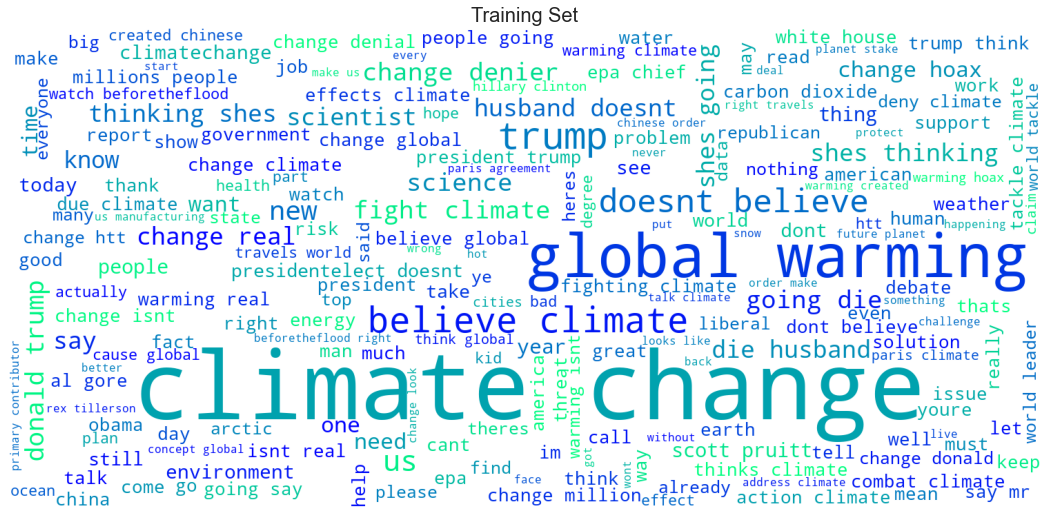

In [ ]:
# Wordcloud for Training Data
plt.figure(figsize = (15, 7), facecolor = None) 
plt.title("Training Set",fontsize=20)
plt.imshow(train_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

plt.show() 

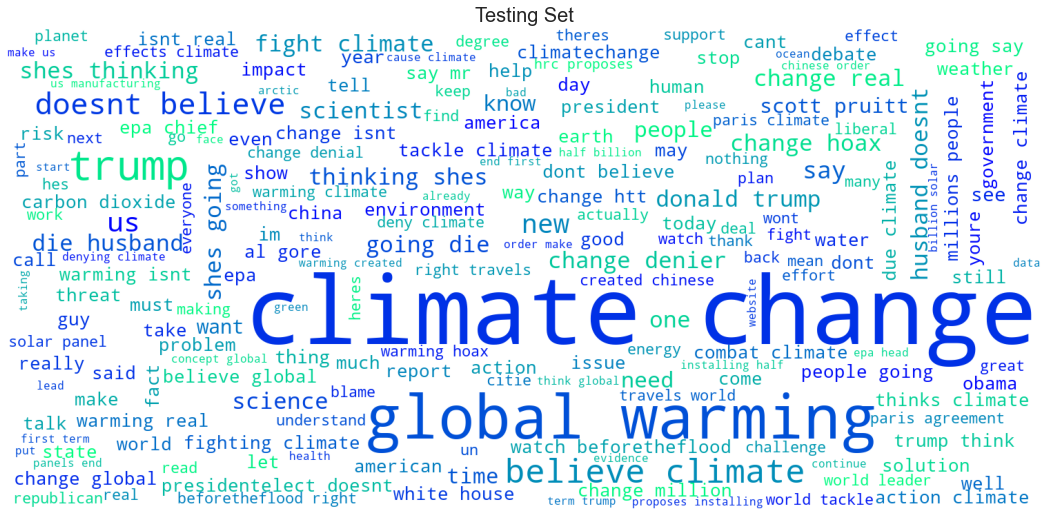

In [ ]:
# Wordcloud for Testing Data
plt.figure(figsize = (15, 7), facecolor = None) 
plt.title("Testing Set",fontsize=20)
plt.imshow(test_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

plt.show() 

### Sentiment Analysis
As part of problem statement it would be interesting to identify how each of the classes express themselves. This give insights into whether classes express themselves with cynicism, positivity or neither of the 2.

It would be reasonable to assume that Pro-class tweets would express negative sentiments because global warming is not positive. Pro Tweeps believe in something negative and could express their belief with a level of synicism or negativity.

Shown below are the plots. The opinion expressed earlier is not fully supported by the data. Anti and Pro classes have similar (38.5% and 38.1%, respectively) proportion of tweets that express express themselves in a positive manner. The Anti class has a higher proportion of tweets that are negatively expressed than the pro group. It could possibly be because Anti climate proponents are associated with right wing politics , which is in turn associated populist hostiliy (Matthew Lockwood, 2018).

It is noteworthy that Anti class has lowest proportion of tweets that are expressed with nuetrality as compared to the other classes' proportions.

Neutrally expressed tweets are largest for the News class, as they are expected to deliver information in a balanced manner. Unexpectedly the proportion of tweets are expressed negatively.

The tweets that fall under Nuetral class have a much larger proportion (49.2%) of tweets that are expressed positively.

Assumption is wrong: The distributions appear to be very similar. Don't know how much of it is due to number of positive vs number negative sentiments.

Neutral and News tend be more nuetral as compared with proportions of other classes. Nuetral also tends to be more positive than the rest.

In [ ]:
# Remove duplicates
drop1 = df_train.drop_duplicates(['message', 'sentiment'])['tweetid'].values
drop2 = df_train.drop_duplicates(['message'])['tweetid'].values
print(f"Data is duplicated {len(df_train)-len(drop2)} times")

# Check for tweets that are the same but have different sentiments
ids = [tweet_id for tweet_id in drop1 if tweet_id not in drop2]
repeated_tweets = []
for tweet_id in ids:
    tweet = df_train[df_train['tweetid']==tweet_id]['message']
    repeated_tweets.append(tweet.values[0])

print('\n\n Tweets that are duplicate but have different sentiments:')
for repeated_tweet in repeated_tweets:
    print(df_train[df_train['message']==repeated_tweet])

# Drop all duplicates from data set
df_train.drop_duplicates(['message', 'sentiment'], inplace=True)

# Drop duplicates with inconsistent classes
inds_to_drop = []
for tweet_id in ids:
    inds_to_drop = df_train[df_train['tweetid']==tweet_id].index[0] 

df_train.drop(index=inds_to_drop, inplace = True)
df_train.set_index('tweetid', inplace=True)

# Vader sentiment analyzer
sid = SentimentIntensityAnalyzer()
def sent_decider(compound):
    """
    Function to determine if sentiment is positive, nuetral or negative
    """
    neutral_point = 0.00
    if compound > neutral_point:
        return 'positive'#1
    elif compound < -neutral_point:
        return 'negative' #-1
    else:
        return 'neutral'#0

# Get sentiment
df_train['scores'] = df_train['message'].apply(lambda review: sid.polarity_scores(review))
df_train['compound']  = df_train['scores'].apply(lambda score_dict: score_dict['compound'])
df_train['comp_score'] = df_train['compound'].apply(sent_decider)

Data is duplicated 1590 times


 Tweets that are duplicate but have different sentiments:
      sentiment                                            message  tweetid
258          -1  RT @Uniocracy: They'll tell you theyre doing i...   529327
5393          0  RT @Uniocracy: They'll tell you theyre doing i...   723133
       sentiment                                            message  tweetid
2390           2  RT @Channel4News: .@LeoDiCaprio calls on citiz...   460524
10351          1  RT @Channel4News: .@LeoDiCaprio calls on citiz...    93815
       sentiment                                            message  tweetid
8446           0  RT @realDonaldTrump: Where the hell is global ...   228082
12001         -1  RT @realDonaldTrump: Where the hell is global ...   663534
       sentiment                                            message  tweetid
9141           0  RT @COP22: In 4 days the most ambitious climat...   407156
14103          1  RT @COP22: In 4 days the most ambitious climat..

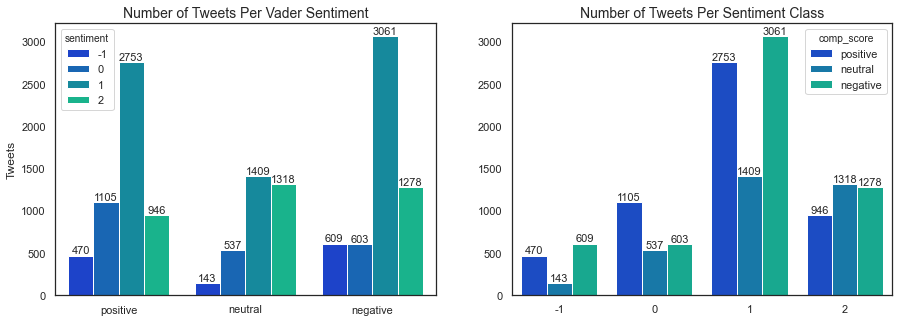

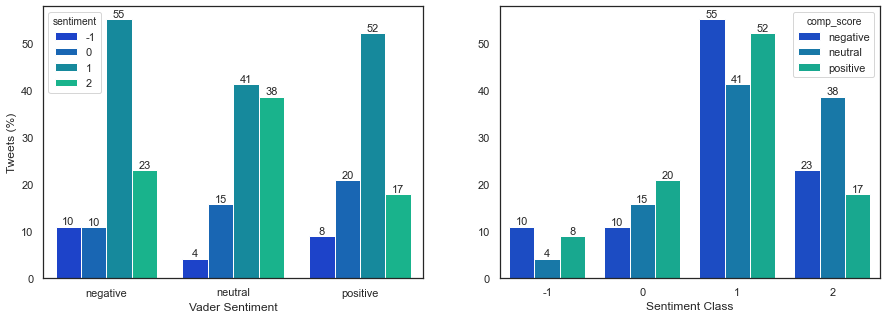

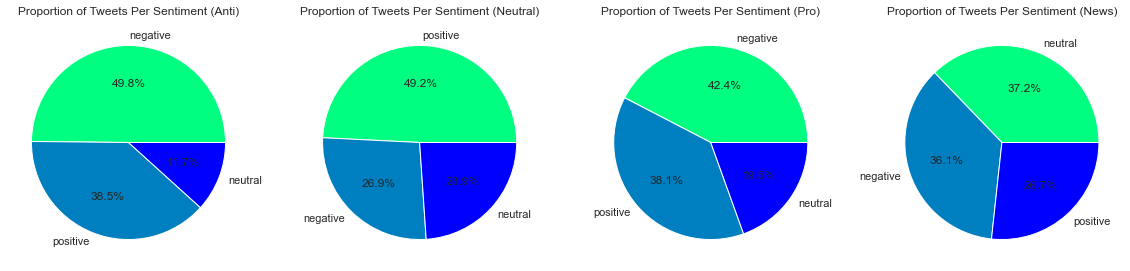

In [ ]:
# Number of Tweets Per Sentiment Class
def put_numbers_on_bars(axis_object):
    for p in axis_object.patches:
        axis_object.text(p.get_x() + p.get_width()/2., p.get_height(),'%d' % int(p.get_height()), fontsize=11,ha='center', va='bottom')

fig, axis = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.countplot(x='comp_score',data=df_train,palette='winter',hue='sentiment',ax=axis[0])
axis[0].set_title('Number of Tweets Per Vader Sentiment',fontsize=14)
axis[0].set_xlabel('')
axis[0].set_ylabel('Tweets')
put_numbers_on_bars(ax)

ax = sns.countplot(x='sentiment',data=df_train,palette='winter',hue='comp_score',ax=axis[1])
axis[1].set_title('Number of Tweets Per Sentiment Class',fontsize=14)
axis[1].set_xlabel('')
axis[1].set_ylabel('')
put_numbers_on_bars(ax)

plt.show()

# Plots as percentages
counts = (df_train.groupby(['comp_score'])['sentiment'].value_counts(normalize=True).rename('percentage_tweets').mul(100).reset_index())

fig, axis = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.barplot(x="comp_score", y="percentage_tweets", palette='winter',hue="sentiment", data=counts, ax=axis[0])
ax.set_xlabel('Vader Sentiment')
ax.set_ylabel('Tweets (%)')
put_numbers_on_bars(ax)

ax = sns.barplot(x="sentiment", y="percentage_tweets", palette='winter',hue="comp_score", data=counts, ax=axis[1])
plt.xlabel('Sentiment Class')
plt.ylabel('')
put_numbers_on_bars(ax)

#Plot pie charts
fig, axis = plt.subplots(ncols=4, figsize=(20, 5))
group = ["(Anti)", "(Neutral)", "(Pro)", "(News)"]
for i in range(4):
    df_train[df_train['sentiment']==i-1]['comp_score'].value_counts().plot.pie(autopct='%1.1f%%',colormap='winter_r',ax=axis[i])
    axis[i].set_title('Proportion of Tweets Per Sentiment '+group[i],fontsize=12)
    axis[i].set_ylabel('')
plt.show()

### Subjectivity and Polarity

In [ ]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def polarity(text):
    return TextBlob(text).sentiment.polarity
df_train['Subjectivity'] = df_train['message'].apply(subjectivity)
df_train['Polarity'] = df_train["message"].apply(polarity)

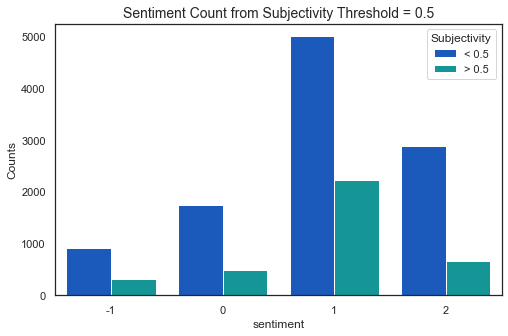

In [ ]:
# Sentiment Count from Subjectivity Threshold = 0.5
df_train['Subj'] = ["> 0.5" if i >=0.5 else "< 0.5" for i in df_train['Subjectivity']]
plt.figure(figsize = (8,5))
sns.countplot(x='sentiment',data=df_train,palette='winter', hue='Subj')
plt.xlabel('sentiment')
plt.ylabel('Counts')
plt.legend(title = 'Subjectivity')
plt.title('Sentiment Count from Subjectivity Threshold = 0.5',fontsize=14)
plt.show()

### Character and Word Frequencies

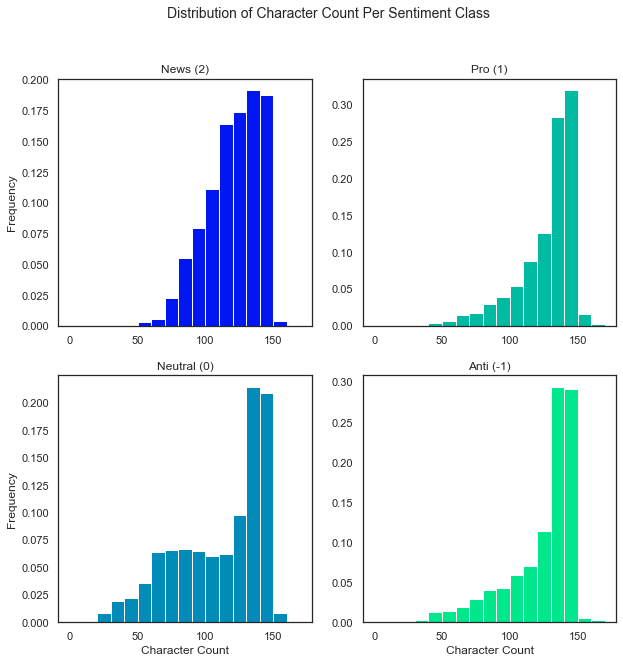

In [ ]:
# Tweet Character lengths
df_train['number_of_characters'] = df_train['message'].apply(lambda x: len(x))

# Distribution of Character Count Per Sentiment Class
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Distribution of Character Count Per Sentiment Class', fontsize=14)

bins = range(0, 180, 10)

train_news = df_train[df_train['sentiment']==2]
axis[0, 0].hist(train_news['number_of_characters'],bins=bins,weights=np.zeros(len(train_news)) + 1. / len(train_news),color='#0017F3')
axis[0, 0].set_title('News (2)')
axis[0, 0].set_ylabel('Frequency')

train_neutral = df_train[df_train['sentiment']==0]
axis[1, 0].hist(train_neutral['number_of_characters'],bins=bins,weights=np.zeros(len(train_neutral)) + 1. / len(train_neutral),color='#008BB9')
axis[1, 0].set_title('Neutral (0)')
axis[1, 0].set_ylabel('Frequency')
axis[1, 0].set_xlabel('Character Count')

train_pro = df_train[df_train['sentiment']==1]
axis[0, 1].hist(train_pro['number_of_characters'],bins=bins,weights=np.zeros(len(train_pro)) + 1. / len(train_pro),color='#00BAA2')
axis[0, 1].set_title('Pro (1)')

train_anti = df_train[df_train['sentiment']==-1]
axis[1, 1].hist(train_anti['number_of_characters'],weights=np.zeros(len(train_anti)) + 1. / len(train_anti),bins=bins,color='#00E88B')
axis[1, 1].set_title('Anti (-1)')
axis[1, 1].set_xlabel('Character Count')

plt.show()

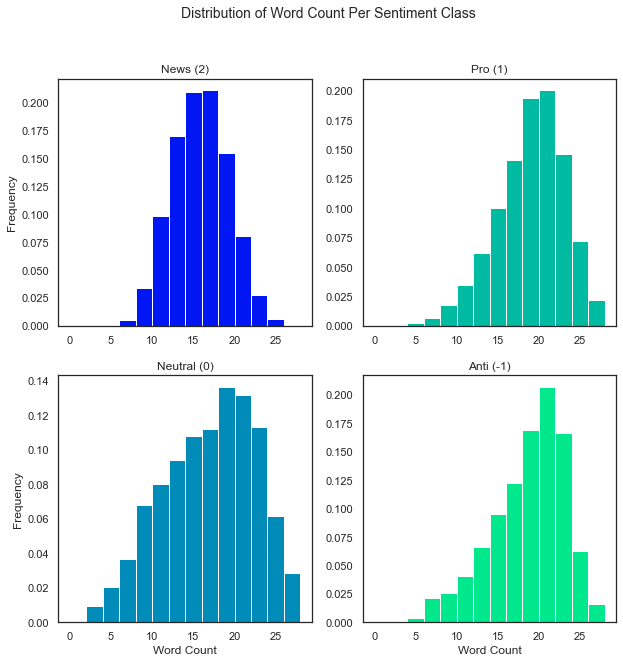

In [ ]:
# Tweet word lengths
df_train['number_of_words'] = df_train['message'].apply(lambda x: len(x.split(' ')))

# Distribution of Word Count Per Sentiment Class
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Distribution of Word Count Per Sentiment Class', fontsize=14)

bins = range(0, 30, 2)

train_news = df_train[df_train['sentiment']==2]
axis[0, 0].hist(train_news['number_of_words'],bins=bins,weights=np.zeros(len(train_news)) + 1. / len(train_news),color='#0017F3')
axis[0, 0].set_title('News (2)')
axis[0, 0].set_ylabel('Frequency')

train_neutral = df_train[df_train['sentiment']==0]
axis[1, 0].hist(train_neutral['number_of_words'],bins=bins,weights=np.zeros(len(train_neutral)) + 1. / len(train_neutral),color='#008BB9')
axis[1, 0].set_title('Neutral (0)')
axis[1, 0].set_ylabel('Frequency')
axis[1, 0].set_xlabel('Word Count')

train_pro = df_train[df_train['sentiment']==1]
axis[0, 1].hist(train_pro['number_of_words'],bins=bins,weights=np.zeros(len(train_pro)) + 1. / len(train_pro),color='#00BAA2')
axis[0, 1].set_title('Pro (1)')

train_anti = df_train[df_train['sentiment']==-1]
axis[1, 1].hist(train_anti['number_of_words'],weights=np.zeros(len(train_anti)) + 1. / len(train_anti),bins=bins,color='#00E88B')
axis[1, 1].set_title('Anti (-1)')
axis[1, 1].set_xlabel('Word Count')

plt.show()

### URL Analysis

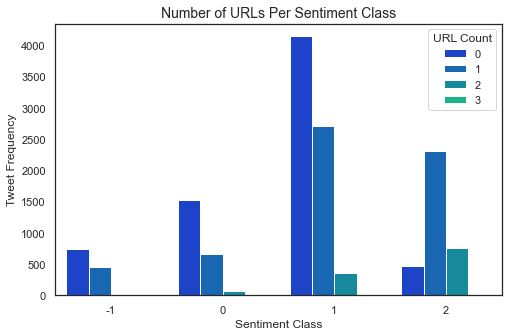

In [ ]:
# Check if URLs have anything to do with distribution of sentiments.
# Count URLs
url_text = r"https?://t\.co/\S+"

df_train['url_list'] = df_train['message'].apply(lambda tweet: re.findall(url_text, tweet))

df_train['url_count'] = df_train['url_list'].apply(len)

#plot sentiment
plt.figure(figsize = (8,5))
sns.countplot(x='sentiment',data=df_train,palette='winter', hue='url_count')
plt.title('Number of URLs Per Sentiment Class',fontsize=14)
plt.xlabel('Sentiment Class')
plt.ylabel('Tweet Frequency')
plt.legend(title='URL Count')
plt.show()

It appears the distribution remains the same excluding when there is 1 or more URLs (excluding news). News agancies appear to be in majority for 2 tweets (even though news tweets are less than half the number of pro-climate change tweets). Also news groups are more likely to have links than not.

In [ ]:
import timeit
rows= list(df_train.iterrows())
checks = [row[1]['url_list'] for row in rows]
not_found = []

import ast
with open('url_dict.txt', 'r') as f:
  url_dict = ast.literal_eval(f.read())

t1 = timeit.default_timer()
for urls in checks[14000:]:
  for url in urls:
    if url:
      if url in url_dict.keys():
        continue
      else:
        try:
          wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
          wd.get(url)
          url_dict[url] = wd.current_url
        except:
          not_found.append(url)
t2 = timeit.default_timer()

print(t2-t1)

with open('url_dict.txt', 'w') as f:
  f.write(str(url_dict))

with open('url_not_found.txt', 'w') as f:
  f.write(str(not_found))

0.0003304999991087243


In [ ]:
# Load url dictionary. link on drive: https://drive.google.com/file/d/1CufT4s8-2T-RArLyprPxd5zqdejt9bgo/view?usp=sharing
import ast
with open('url_dict.txt', 'r') as f:
  url_dict = ast.literal_eval(f.read())

In [ ]:
# URL Convert URL in dataframe
def expand_short_url(short_url, url_dict=url_dict):
  if short_url in url_dict.keys():
    return url_dict[short_url]
  else:
    return None

df_train['expanded_urls'] = df_train['url_list'].apply(lambda url_list: [expand_short_url(url) for url in url_list if url])

In [ ]:
# Check Domains
#!pip install tldextract
import tldextract
# tldextract.extract(df_train['long_urls'][0][0]).domain

df_train['domains'] = df_train['expanded_urls'].apply(lambda urls: [tldextract.extract(url).domain for url in urls if url])

# count domains
domain_count = {}
for ind, row in df_train.iterrows():
  for i, domain in enumerate(row['domains']):
    if domain:
      if domain in domain_count.keys():
        domain_count[domain] += 1
      else:
        domain_count[domain] = 1

### Domain, Hashtag and Mention Analysis

In [ ]:
# Remove punctuation at end of hashtag
import string
def grab_hash_tags_or_mention(tweet, grab='#'):
    return [tag.lower() for tag in tweet.split() if tag.startswith(grab)]

puntuations=string.punctuation+'…'+'Ã¢â‚¬Â¦'

def remove_punct_end_of_tag(tag):
    ortag = tag
    not_alpha=True
    tag_lenth = len(tag)
    if tag_lenth <= 2:
        return None
    elif (tag[-8:]=='#Ã¢â‚¬Â¦') or (tag[-8:]=='@Ã¢â‚¬Â¦'):
        return None
    for i in range(tag_lenth):
        if tag:
            if (tag[-1] in puntuations):
                tag = tag[:-1]
                not_alpha = tag[-1] in puntuations
            else:
                break         
    return tag

In [ ]:
# Grab Hash tags and @ mentions
df_train['hash_tags'] = df_train['message'].apply(grab_hash_tags_or_mention)
df_train['hash_tags'] = df_train['hash_tags'].apply(lambda tags: [remove_punct_end_of_tag(tag) for tag in tags if tag])

df_train['mentions'] = df_train['message'].apply(lambda tweet: grab_hash_tags_or_mention(tweet, grab='@'))
df_train['mentions'] = df_train['mentions'].apply(lambda tags: [remove_punct_end_of_tag(tag) for tag in tags if tag])

In [ ]:
HT_neg = df_train['hash_tags'][df_train['sentiment'] == -1]
HT_neutral = df_train['hash_tags'][df_train['sentiment'] == 0]
HT_pos = df_train['hash_tags'][df_train['sentiment'] == 1]
HT_news = df_train['hash_tags'][df_train['sentiment'] == 2]

HT_neg = sum(HT_neg, [])
HT_neutral = sum(HT_neutral, [])
HT_pos = sum(HT_pos, [])
HT_news = sum(HT_news, [])

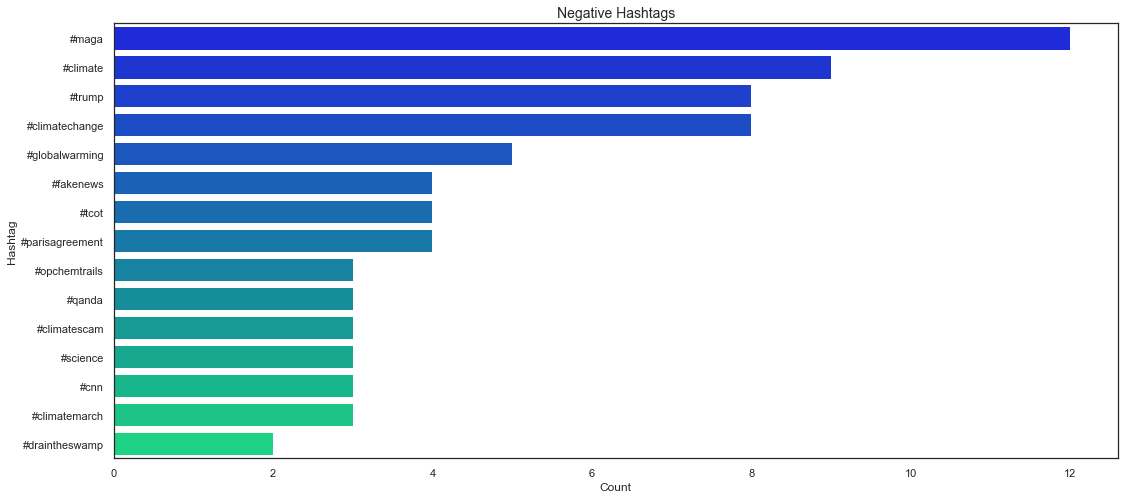

In [ ]:
# HT_neg
p = nltk.FreqDist(HT_neg)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=d, y = 'Hashtag', x = 'Count', palette='winter',orient='h')
plt.title('Negative Hashtags',fontsize=14)
plt.show()

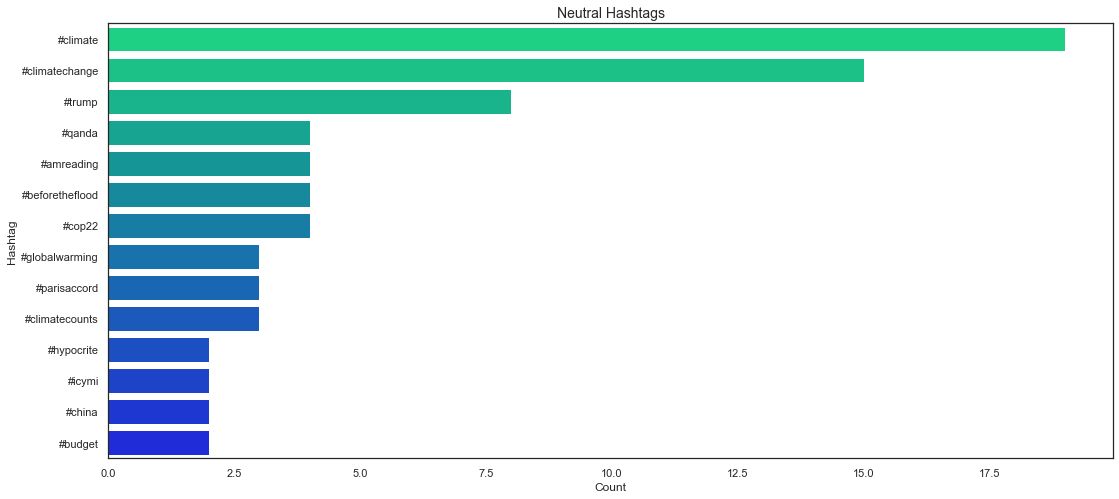

In [ ]:
p = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=d, y = 'Hashtag', x = 'Count', palette='winter_r',orient='h')
plt.title('Neutral Hashtags',fontsize=14)
plt.show()

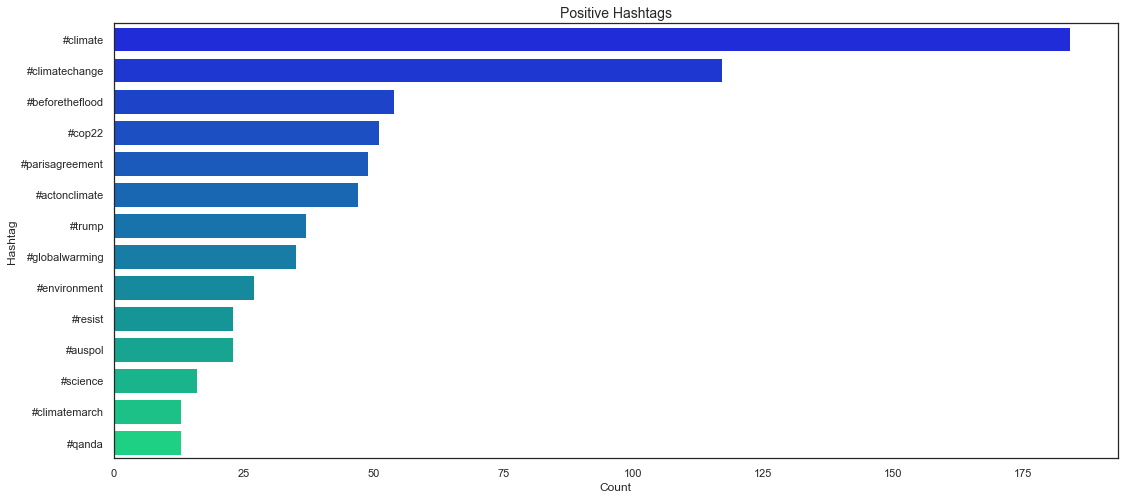

In [ ]:
# HT_pos
p = nltk.FreqDist(HT_pos)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=d, y = 'Hashtag', x = 'Count', palette='winter',orient='h')
plt.title('Positive Hashtags',fontsize=14)
plt.show()

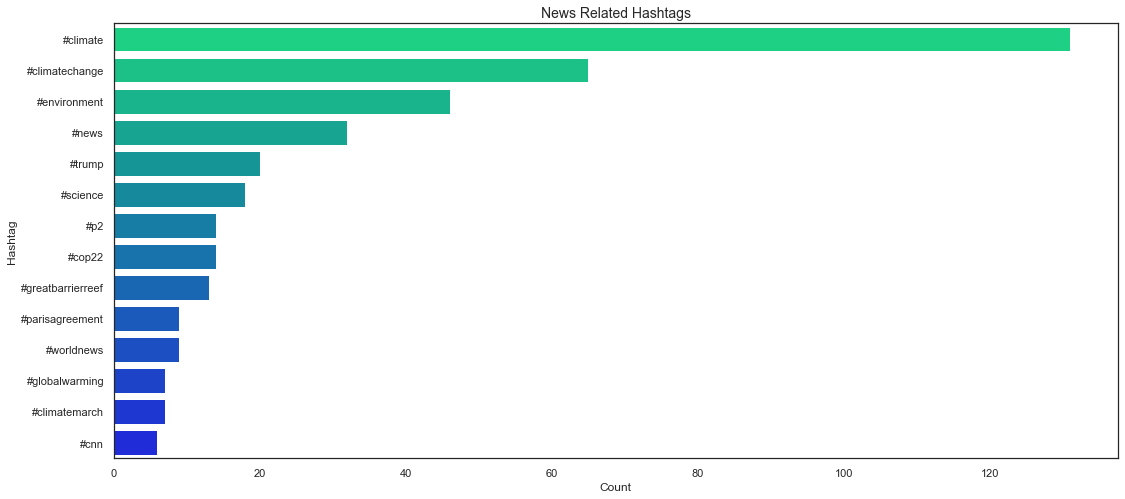

In [ ]:
# HT_news
p = nltk.FreqDist(HT_news)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=d, y = 'Hashtag', x = 'Count', palette='winter_r',orient='h')
plt.title('News Related Hashtags',fontsize=14)
plt.show()

In [ ]:
# Make count dataframes
from collections import Counter

def mentions_or_hash_count_df(df, col = 'mentions'):    
    tags = []
    for i, row in df.iterrows():
        for tag in row[col]:
            if tag:
                tags.append(tag)
    counts = dict(Counter(tags)).items()
    return pd.DataFrame(counts, columns=[col, col+'_count']).sort_values(by=col+'_count', ascending=False)

mentions_counts = mentions_or_hash_count_df(df_train, col = 'mentions')
hash_tags = mentions_or_hash_count_df(df_train, col = 'hash_tags')
domain_counts = mentions_or_hash_count_df(df_train, col = 'domains')

In [ ]:
# Create tables for sentiment for Hashtag- and Mentions counts

df_sent_selctors = [df_train['sentiment']==sent for sent in [-1,0,1,2]]

# create empty dataframe that will store the counts with sentiments
mentions_sents = pd.DataFrame(columns=['mentions', 'mentions_count', 'sentiment'])
hash_sents = pd.DataFrame(columns=['hash_tags', 'hash_tags_count', 'sentiment'])
domain_sents = pd.DataFrame(columns=['domains', 'domains_count', 'sentiment'])

#add values to the empty dataframe
for i, selector in enumerate(df_sent_selctors): 
  # mentions
    mentions_counts = mentions_or_hash_count_df(df_train[selector], col = 'mentions')
    mentions_counts['sentiment'] = i-1
    mentions_sents=pd.concat([mentions_sents, mentions_counts], ignore_index=True,copy=False)
  
  # hashtags
    hash_counts = mentions_or_hash_count_df(df_train[selector], col = 'hash_tags')
    hash_counts['sentiment'] = i-1
    hash_sents = pd.concat([hash_sents, hash_counts], ignore_index=True,copy=False)

  # domains
    domain_counts = mentions_or_hash_count_df(df_train[selector], col = 'domains')
    domain_counts['sentiment'] = i-1
    domain_sents = pd.concat([domain_sents, domain_counts], ignore_index=True,copy=False)

In [ ]:
# Check Domain counts with sentiments
d = domain_sents.drop(columns=['sentiment']).groupby('domains').sum()
# (d['domains_count']).sort_values()
# d[d['domains_count']>100].describe()
d = d[d['domains_count']>40].sort_values(by= 'domains_count',ascending=False)
print(d)
top_domains = list(d.index)

                    domains_count
domains                          
twitter                      2278
theguardian                   348
washingtonpost                178
independent                   134
google                        124
cnn                           121
nytimes                       115
huffpost                       93
thehill                        90
youtube                        79
reuters                        75
t                              65
thinkprogress                  53
asian-news-channel             53
linkis                         50
bloomberg                      48
mashable                       47
facebook                       44
bbc                            41


In [ ]:
# Check Hashtag counts with Sentiments
b = hash_sents.drop(columns=['sentiment']).groupby('hash_tags').sum()
(b['hash_tags_count']).sort_values()
b = b[b['hash_tags_count']>20].sort_values(by= 'hash_tags_count',ascending=False)
print(b)
top_hash_tags = list(b.index)

                 hash_tags_count
hash_tags                       
#climate                     343
#climatechange               205
#environment                  74
#trump                        73
#cop22                        69
#parisagreement               63
#beforetheflood               61
#globalwarming                50
#actonclimate                 47
#science                      39
#news                         34
#auspol                       29
#p2                           26
#climatemarch                 25
#resist                       23
#maga                         22


In [ ]:
# Check Mentions counts with sentiments
a = mentions_sents.drop(columns=['sentiment']).groupby('mentions').sum()
# (a['mentions_count']).sort_values()
# a[a['mentions_count']>1].describe()
a = a[a['mentions_count']>40].sort_values(by= 'mentions_count',ascending=False)
print(a)
top_mentions = list(a.index)

                  mentions_count
mentions                        
@realdonaldtrump             213
@nytimes                      98
@thehill                      91
@cnn                          88
@washingtonpost               73
@climatecentral               67
@climatehawk1                 63
@independent                  56
@guardian                     54
@sensanders                   46
@stevesgoddard                45
@reuters                      41


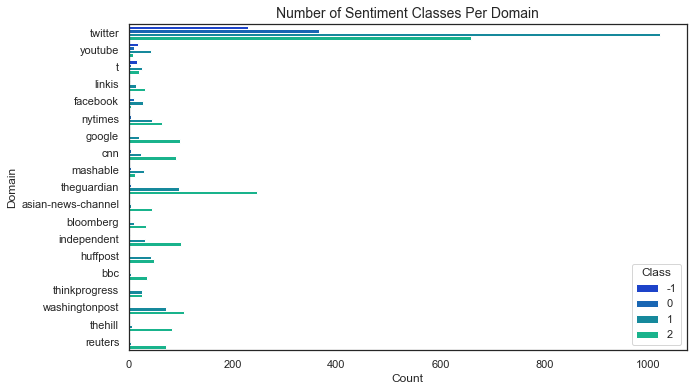

In [ ]:
# Domain Counts
fig,axis = plt.subplots(figsize=(10,6))
conditions = [(domain_sents['domains']==domain) for domain in top_domains]

selector = domain_sents['domains'] == ',,,,,,'    
for condition in conditions:
    selector = selector|condition

sns.barplot(y='domains', x= 'domains_count',data=domain_sents[selector],palette='winter', hue='sentiment',orient='h')
plt.title('Number of Sentiment Classes Per Domain',fontsize=14)
plt.xlabel('Count')
plt.ylabel('Domain')
plt.legend(title='Class',loc='lower right')
plt.show()

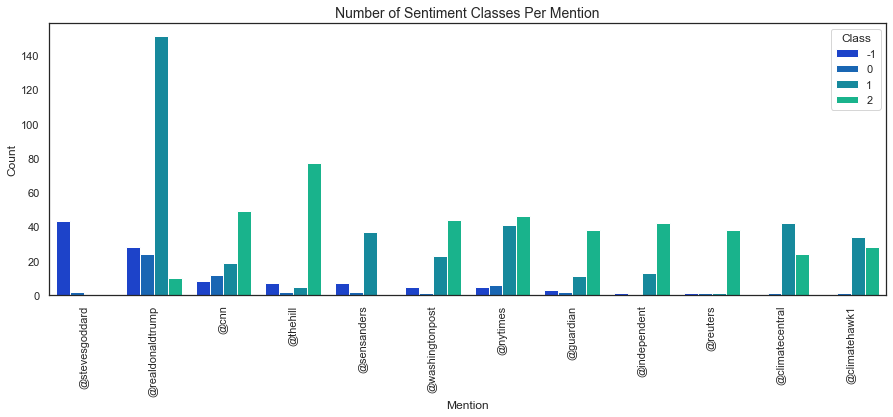

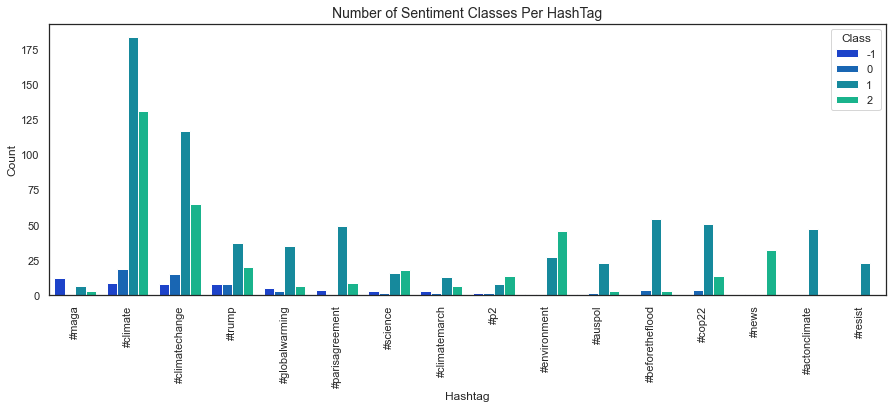

In [ ]:
# Top Mentions and Hashtags
conditions = [(mentions_sents['mentions']==mention) for mention in top_mentions]
selector = mentions_sents['mentions'] == ',,,,,,'    
for condition in conditions:
    selector = selector|condition

fig,axis = plt.subplots(figsize=(15,5))
sns.barplot(x='mentions', y = 'mentions_count',data=mentions_sents[selector],palette='winter', hue='sentiment')
plt.xticks(rotation=90)
plt.title('Number of Sentiment Classes Per Mention',fontsize=14)
plt.legend(title='Class',loc='upper right')
plt.ylabel('Count')
plt.xlabel('Mention')
plt.show()

conditions = [(hash_sents['hash_tags']==hashtag) for hashtag in top_hash_tags]
selector = hash_sents['hash_tags'] == ',,,,,,' 
for condition in conditions:
    selector = selector|condition
    
fig,axis = plt.subplots(figsize=(15,5))
sns.barplot(x='hash_tags', y = 'hash_tags_count',data=hash_sents[selector], palette='winter',hue='sentiment')
plt.xticks(rotation=90)
plt.title('Number of Sentiment Classes Per HashTag',fontsize=14)
plt.legend(title='Class',loc='upper right')
plt.ylabel('Count')
plt.xlabel('Hashtag')
plt.show()

### Retweet Analysis

It appears that all Sanders and Schlegel (and many more) are due mentions are all due to retweets. Could these retweets be the reason that there are so MUCH MORE Pro climate change tweets? If you look at the non-retweeted-tweets the pro class is not as exergerated.

The @realDonaldTrump tweets do not show up as much as the other mentions and hashtags. Also these mentions and hashtags do not have an exergerated difference (wrt classes).

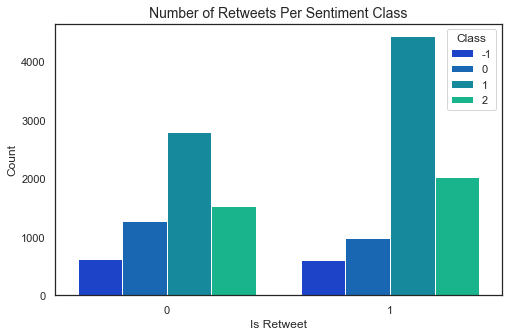

In [ ]:
# Class distribution for set of retweeted-tweets and set without retweets
plt.figure(figsize = (8,5))
df_train['is_retweet'] = df_train['message'].apply(lambda tweet: 1 if tweet.startswith('RT @') else 0)
sns.countplot(x='is_retweet', data=df_train, palette='winter', hue='sentiment')
plt.title('Number of Retweets Per Sentiment Class',fontsize=14)
plt.xlabel('Is Retweet')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

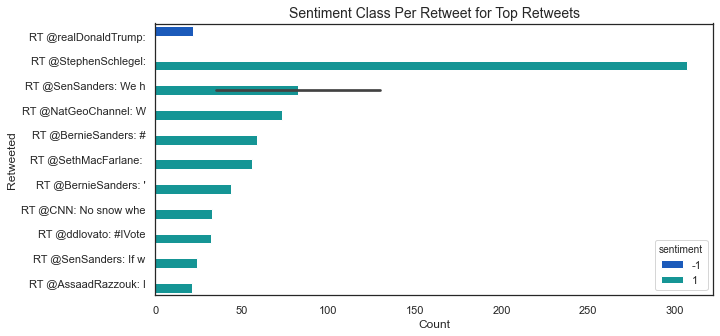

In [ ]:
# Top retweets per Sentiment
df_train1 = pd.read_csv('Data/train.csv')
def count_retweets(df):
    retweets = []
    for i, row in df.iterrows():
        if row['message'].startswith('RT @'):
            retweets.append(row['message'])
    counts = dict(Counter(retweets)).items()
    return pd.DataFrame(counts, columns=['retweeted', 'retweet_count']).sort_values(by='retweet_count', ascending=False)

df_sent_selctors = [df_train1['sentiment']==sent for sent in [-1,0,1,2]]
retweet_sents = pd.DataFrame(columns=['retweeted', 'retweet_count', 'sentiment'])

for i, selector in enumerate(df_sent_selctors):
    retweet_counts = count_retweets(df_train1[selector])
    retweet_counts['sentiment'] = i-1
    retweet_sents=pd.concat([retweet_sents, retweet_counts], ignore_index=True,copy=False)  
    
c = retweet_sents.drop(columns=['sentiment']).groupby('retweeted').sum()
c = c[c['retweet_count']>20].sort_values(by= 'retweet_count').index
top_retweets = list(c)

#Plot for all sents
conditions = [(retweet_sents['retweeted']==retweet) for retweet in top_retweets]
selector = retweet_sents['retweeted'] == ',,,,,,' 

for condition in conditions:
    selector = selector|condition

shortened_retweets = retweet_sents.copy()
shortened_retweets['retweeted'] = shortened_retweets['retweeted'].apply(lambda rt: rt[:20])
fig,axis = plt.subplots(figsize=(10,5))
sns.barplot(y='retweeted', x = 'retweet_count',data=shortened_retweets[selector], palette='winter', hue='sentiment',orient='h')
plt.title('Sentiment Class Per Retweet for Top Retweets',fontsize=14)
plt.xlabel('Count')
plt.ylabel('Retweeted')
plt.show()

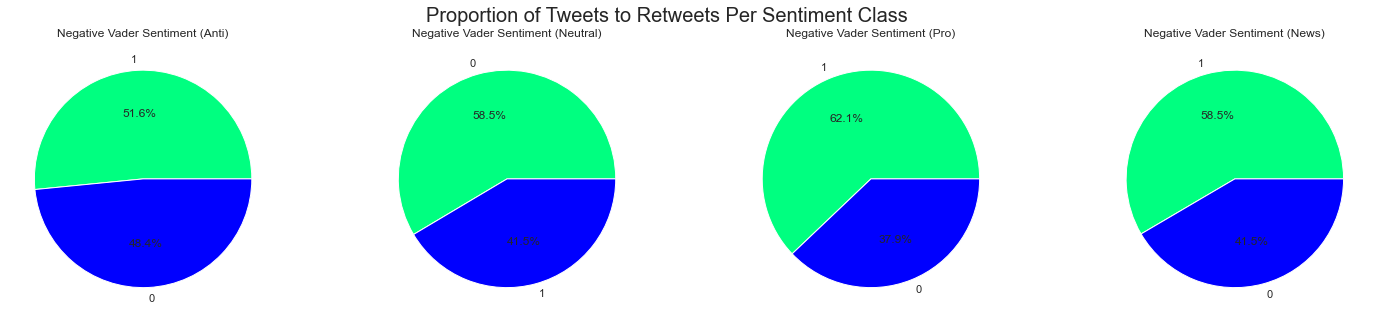

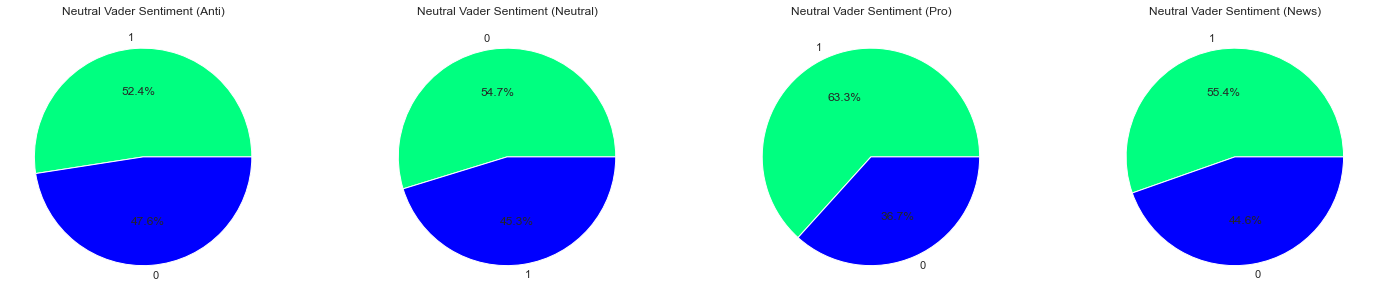

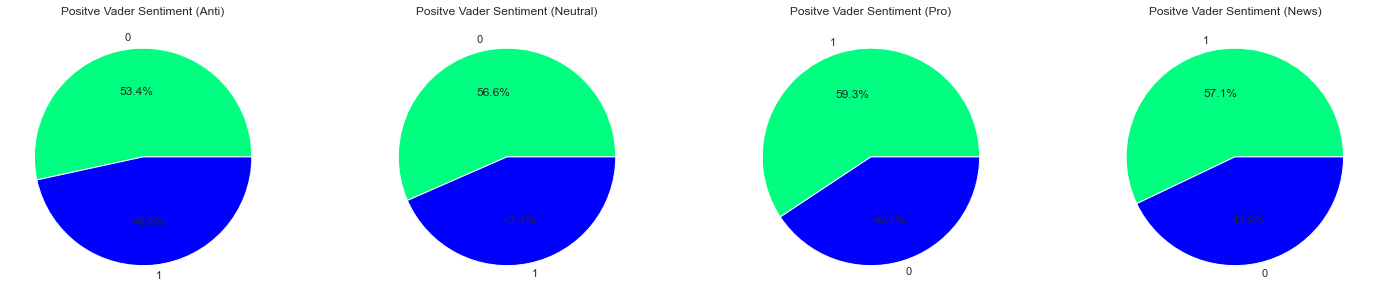

In [ ]:
# Retweet Proportions
df_train['is_retweet'] = df_train['message'].apply(
                            lambda tweet: 1 if tweet.startswith('RT @') else 0)
fig, axis = plt.subplots(ncols=4, figsize=(25, 5))
fig.suptitle('Proportion of Tweets to Retweets Per Sentiment Class', fontsize=20)
group = ["(Anti)", "(Neutral)", "(Pro)", "(News)"]
for i in range(4):
  df_train[(df_train['sentiment']==i-1) & (df_train['comp_score']=='negative')]['is_retweet'].value_counts().plot.pie(autopct='%1.1f%%',colormap='winter_r',ax=axis[i])
  axis[i].set_title('Negative Vader Sentiment '+group[i])
  axis[i].set_ylabel('')
plt.show()

fig, axis = plt.subplots(ncols=4, figsize=(25, 5))
for i in range(4):
  df_train[(df_train['sentiment']==i-1) & (df_train['comp_score']=='neutral')]['is_retweet'].value_counts().plot.pie(autopct='%1.1f%%',colormap='winter_r',ax=axis[i])
  axis[i].set_title('Neutral Vader Sentiment '+group[i])
  axis[i].set_ylabel('')
plt.show()

fig, axis = plt.subplots(ncols=4, figsize=(25, 5))
for i in range(4):
  df_train[(df_train['sentiment']==i-1) & (df_train['comp_score']=='positive')]['is_retweet'].value_counts().plot.pie(autopct='%1.1f%%',colormap='winter_r',ax=axis[i])
  axis[i].set_title('Positve Vader Sentiment '+group[i])
  axis[i].set_ylabel('')
plt.show()

<a id="preprocessing"></a>
## 5. Data Preprocessing

### Lemmatisation

In [ ]:
def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word) ## finding word that is most similar (synonyms) for semantic reasoning
    pos_counts = Counter() # instantiating our counter class
    
    ## finding part of speech of word if part of speech is either noun, verb, adjective etc and add it up in a list
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0] ## will extract the most likely part of speech from the list
    return most_likely_part_of_speech

normalizer = WordNetLemmatizer()
def lemmatise_words(df):
    df['lemma'] = df['final'].apply(lambda x: [normalizer.lemmatize(token, get_part_of_speech(token)) for token in x]) ## lemmatize by way of applying part of speech
    return df['lemma']

train_data['lemma'] = lemmatise_words(train_data)
test_data['lemma'] = lemmatise_words(test_data)

### Split Training and Validation Sets

In [ ]:
X = train_data['lemma']
y = train_data['sentiment']
X_test = test_data['lemma']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state = 42)

### Feature Extraction

In [ ]:
X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))
vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf = True, max_df = 0.3, min_df = 5, token_pattern = r'\w{1,}', strip_accents = 'ascii', ngram_range = (1, 5))
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

<a id="modelling"></a>
## 6. Modelling

### Logistic Regression

In [ ]:
modelstart= time.time()
logreg = LogisticRegression(n_jobs=1, C=1e5, random_state=42, multi_class='ovr')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))
logreg_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
model_save_path = "logreg_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(logreg,file)

accuracy 0.7338811630847029
              precision    recall  f1-score   support

          -1       0.58      0.53      0.55       126
           0       0.49      0.47      0.48       224
           1       0.80      0.82      0.81       895
           2       0.76      0.76      0.76       337

    accuracy                           0.73      1582
   macro avg       0.66      0.65      0.65      1582
weighted avg       0.73      0.73      0.73      1582

Model Runtime: 2.07 seconds


### Multinomial Naive Bayes

In [ ]:
modelstart= time.time()
multinb = MultinomialNB()
multinb.fit(X_train, y_train)
y_pred = multinb.predict(X_val)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))
multinb_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
model_save_path = "multinb_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(multinb,file)

accuracy 0.7117572692793932
              precision    recall  f1-score   support

          -1       0.84      0.17      0.28       126
           0       0.80      0.18      0.30       224
           1       0.69      0.93      0.79       895
           2       0.78      0.70      0.73       337

    accuracy                           0.71      1582
   macro avg       0.78      0.49      0.53      1582
weighted avg       0.74      0.71      0.67      1582

Model Runtime: 0.03 seconds


### Random Forest Classifier

In [ ]:
modelstart= time.time()
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=1, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))
rf_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
model_save_path = "rf_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rf,file)

accuracy 0.565739570164349
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       126
           0       0.00      0.00      0.00       224
           1       0.57      1.00      0.72       895
           2       0.00      0.00      0.00       337

    accuracy                           0.57      1582
   macro avg       0.14      0.25      0.18      1582
weighted avg       0.32      0.57      0.41      1582

Model Runtime: 0.34 seconds


### Support Vector Classifier

In [ ]:
modelstart= time.time()
svc = SVC(gamma = 1, C = 10)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))
svc_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
model_save_path = "svc_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svc,file)

accuracy 0.7711757269279393
              precision    recall  f1-score   support

          -1       0.75      0.41      0.53       126
           0       0.63      0.43      0.51       224
           1       0.78      0.91      0.84       895
           2       0.81      0.77      0.79       337

    accuracy                           0.77      1582
   macro avg       0.74      0.63      0.67      1582
weighted avg       0.76      0.77      0.76      1582

Model Runtime: 126.49 seconds


### Linear SVC

In [ ]:
modelstart= time.time()
linsvc = LinearSVC()
linsvc.fit(X_train, y_train)
y_pred = linsvc.predict(X_val)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))
linsvc_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
model_save_path = "linsvc_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(linsvc,file)

accuracy 0.7667509481668774
              precision    recall  f1-score   support

          -1       0.69      0.50      0.58       126
           0       0.56      0.47      0.51       224
           1       0.81      0.87      0.84       895
           2       0.78      0.79      0.78       337

    accuracy                           0.77      1582
   macro avg       0.71      0.66      0.68      1582
weighted avg       0.76      0.77      0.76      1582

Model Runtime: 0.40 seconds


### K Neighbours Classifier

In [ ]:
modelstart= time.time()
kn = KNeighborsClassifier(3)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_val)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))
kn_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
model_save_path = "kn_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(kn,file)

accuracy 0.3780025284450063
              precision    recall  f1-score   support

          -1       0.56      0.17      0.27       126
           0       0.19      0.94      0.31       224
           1       0.90      0.27      0.41       895
           2       0.81      0.38      0.51       337

    accuracy                           0.38      1582
   macro avg       0.61      0.44      0.38      1582
weighted avg       0.75      0.38      0.41      1582

Model Runtime: 0.79 seconds


### Decision Tree Classifier

In [ ]:
modelstart= time.time()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)    
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))
dt_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
model_save_path = "dt_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(dt,file)

accuracy 0.5992414664981036
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       126
           0       0.63      0.18      0.28       224
           1       0.63      0.85      0.72       895
           2       0.48      0.45      0.46       337

    accuracy                           0.60      1582
   macro avg       0.44      0.37      0.37      1582
weighted avg       0.55      0.60      0.55      1582

Model Runtime: 0.20 seconds


### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(X_train, y_train)
y_pred = ad.predict(X_val)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))
ad_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
model_save_path = "ad_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(ad,file)

accuracy 0.640960809102402
              precision    recall  f1-score   support

          -1       0.58      0.30      0.40       126
           0       0.48      0.26      0.34       224
           1       0.69      0.81      0.75       895
           2       0.56      0.56      0.56       337

    accuracy                           0.64      1582
   macro avg       0.58      0.49      0.51      1582
weighted avg       0.62      0.64      0.62      1582

Model Runtime: 2.93 seconds


<a id="evaluation"></a>
## 7. Performance Evaluation

### Performance Metrics of Best Models

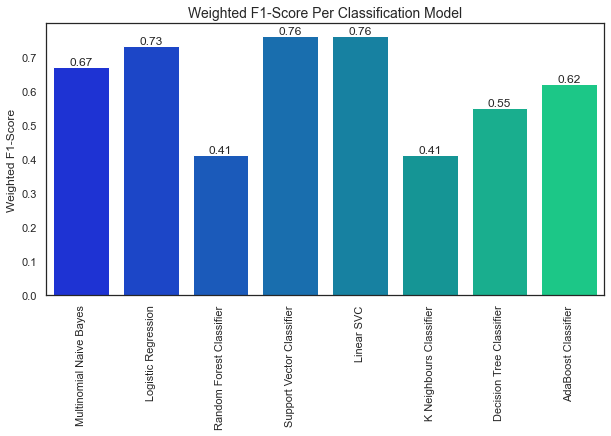

In [ ]:
# Compare Weighted F1-Scores Between Models
fig,axis = plt.subplots(figsize=(10, 5))
rmse_x = ['Multinomial Naive Bayes','Logistic Regression','Random Forest Classifier','Support Vector Classifier','Linear SVC','K Neighbours Classifier','Decision Tree Classifier','AdaBoost Classifier']
rmse_y = [multinb_f1,logreg_f1,rf_f1,svc_f1,linsvc_f1,kn_f1,dt_f1,ad_f1]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='winter')
plt.title('Weighted F1-Score Per Classification Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1-Score')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()

### Hyperparameter Tuning of Best Models

**Logistic Regression**

In [ ]:
# Logistic Regression
nfolds = 5
param_grid = {'penalty': ['l1','l2'], 'C': [1,100,1e5],'multi_class' : ['auto', 'ovr', 'multinomial']}
grid_LR = GridSearchCV(LogisticRegression(), param_grid, scoring='f1_weighted', cv=nfolds, verbose=0)
print("Best score: " + str(grid_LR.best_score_))
print(grid_LR.best_params_)

Best score: 0.7179583452981237
{'C': 100, 'multi_class': 'ovr', 'penalty': 'l2'}


In [ ]:
grid_LR_model = LogisticRegression(**grid_LR.best_params_)
grid_LR_model.fit(X_train, y_train)
y_pred = grid_LR_model.predict(X_val)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

accuracy 0.7572692793931732
              precision    recall  f1-score   support

          -1       0.65      0.55      0.59       126
           0       0.54      0.50      0.52       224
           1       0.81      0.84      0.83       895
           2       0.78      0.78      0.78       337

    accuracy                           0.76      1582
   macro avg       0.69      0.67      0.68      1582
weighted avg       0.75      0.76      0.75      1582



**Support Vector Classifier**

In [ ]:
# Support Vector Classifier
# param_grid = {'penalty': ['l1','l2'], 'C': [0.1,1,10,100,1000],'multi_class' : ['crammer_singer', 'ovr']}
# grid_SVC = GridSearchCV(SVC(), param_grid, scoring='f1_weighted', cv=nfolds)
# grid_SVC.fit(X_train, y_train)
# y_pred = grid_SVC.predict(X_val)
# print('accuracy %s' % accuracy_score(y_pred, y_val))
# print(classification_report(y_val, y_pred))
# print("Best score: " + str(grid_SVC.best_score_))
# print(grid_SVC.best_params_)

In [ ]:
# grid_LR_model = LogisticRegression(**grid_LR.best_params_)
# grid_LR_model.fit(X_train, y_train)
# y_pred = grid_LR_model.predict(X_val)
# print('accuracy %s' % accuracy_score(y_pred, y_val))
# print(classification_report(y_val, y_pred))

**Linear SVC**

In [ ]:
# Linear SVC
# param_grid = {'penalty': ['l1','l2'], 'C': [0.1,1,10,100,1000],'multi_class' : ['crammer_singer', 'ovr']}
# grid_LSVC = GridSearchCV(LinearSVC(), param_grid, scoring='f1_weighted', cv=nfolds)
# grid_LSVC.fit(X_train, y_train)
# y_pred = grid_LSVC.predict(X_val)
# print('accuracy %s' % accuracy_score(y_pred, y_val))
# print(classification_report(y_val, y_pred))
# print("Best score: " + str(grid_LSVC.best_score_))
# print(grid_LSVC.best_params_)

In [ ]:
# grid_LR_model = LogisticRegression(**grid_LR.best_params_)
# grid_LR_model.fit(X_train, y_train)
# y_pred = grid_LR_model.predict(X_val)
# print('accuracy %s' % accuracy_score(y_pred, y_val))
# print(classification_report(y_val, y_pred))

<a id="analysis"></a>
## 8. Model Analysis

### Performance Metrics

In [ ]:
best_model = SVC(gamma = 1, C = 10)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_val)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

accuracy 0.7711757269279393
              precision    recall  f1-score   support

          -1       0.75      0.41      0.53       126
           0       0.63      0.43      0.51       224
           1       0.78      0.91      0.84       895
           2       0.81      0.77      0.79       337

    accuracy                           0.77      1582
   macro avg       0.74      0.63      0.67      1582
weighted avg       0.76      0.77      0.76      1582



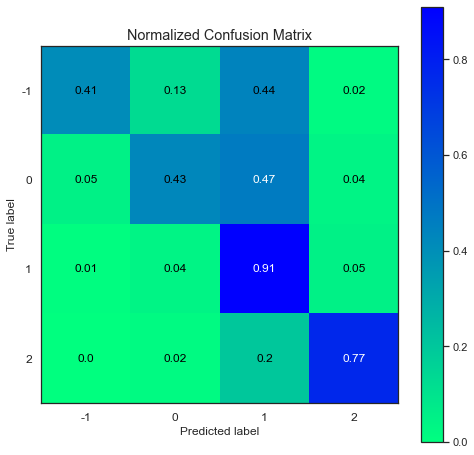

In [ ]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### ROC Curves and AUC

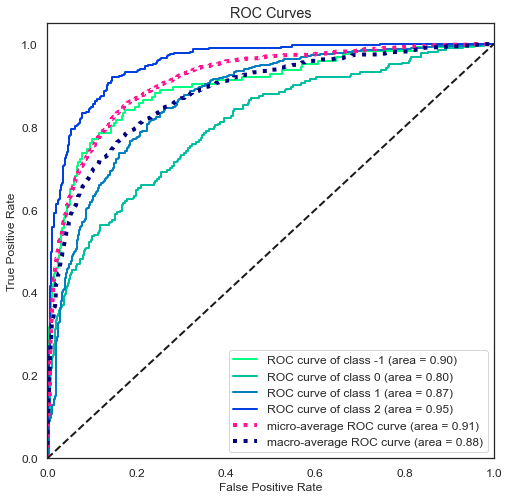

In [ ]:
# If model doesn't take "probability=True" as an argument (e.g. LinearSVC)
ovr =  OneVsRestClassifier(LinearSVC(random_state=42,class_weight='balanced'))

y_train_binarized = label_binarize(y_train, classes=[-1, 0, 1, 2])
y_val_binarized = label_binarize(y_val, classes=[-1, 0, 1, 2])
n_classes = 4

ovr.fit(X_train, y_train_binarized)

# decision_function predicts a “soft” score for each sample in relation to each class, 
# rather than the “hard” categorical prediction produced by predict. Its input is 
# usually only some observed data, X.
y_probas = ovr.decision_function(X_val)

plot_roc(y_val, y_probas,figsize=(8,8),cmap='winter_r')
plt.show()

### Results

In [ ]:
# Make prediction on test data
final_model = SVC(gamma = 1, C = 10)
final_model.fit(X,y)
y_test = final_model.predict(X_test)

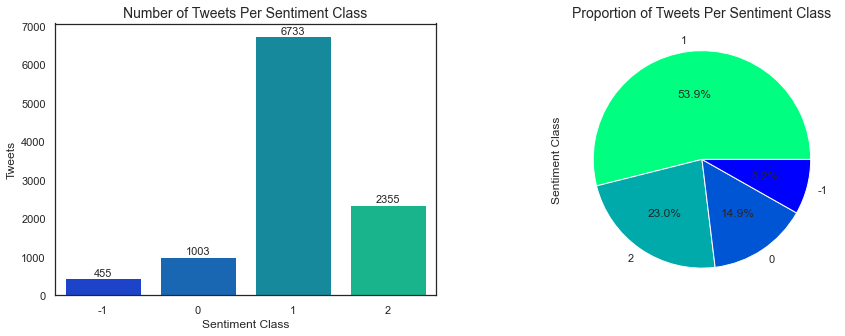

In [ ]:
# Number of Tweets Per Sentiment Class
fig, axis = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.countplot(y_test,palette='winter',ax=axis[0])
axis[0].set_title('Number of Tweets Per Sentiment Class',fontsize=14)
axis[0].set_xlabel('Sentiment Class')
axis[0].set_ylabel('Tweets')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')

train_data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%',colormap='winter_r',ax=axis[1])
axis[1].set_title('Proportion of Tweets Per Sentiment Class',fontsize=14)
axis[1].set_ylabel('Sentiment Class')
    
plt.show()

<a id="conclusion"></a>
## 9. Conclusion

<a id="save"></a>
## 10. Save Models and Output

In [ ]:
# Create Kaggle Submission File
results = pd.DataFrame({"tweetid":test_data['tweetid'],"sentiment": y_test})
results.to_csv("svc_test1.csv", index=False)

In [ ]:
# Save Vectoriser File
vect_save_path = "vectorizer.pkl"
with open(vect_save_path,'wb') as file:
    pickle.dump(vectorizer,file)

In [ ]:
# Save Classification Model File
# model_save_path = "final_model.pkl"
# with open(model_save_path,'wb') as file:
#     pickle.dump(final_model,file)

[Back to top ↑](#top)

<sub>*Team name credit: Ridha (& Freud's mom)</sub>